## Synthoseis Quick Start Notebook

Synthoseis is an open source, Python-based tool used for generating pseudo-random seismic data. The goal of Synthoseis is to generate realistic seismic data for deep learning training. This notebook will serve as a guide to getting your first Synthoseis model up and running. Future notebooks will discuss seismic outputs, visualizations, and building a custom rock properties model.

### Environment Build

To install the necessary packages, use the `environment.yml` file to create a virtual or conda environment. Please note that the most recent version of Synthoseis has been refactored to work with Python 3.10.

### Imports

Within the main directory of the repo is a script called `main.py`. This is the primary script to run the program. Import `main.py`, along with visualization tools to view the results.

In [1]:
import os
import sys

# Add the parent directory to the system path
sys.path.append("../")

In [2]:
import main as mn 
import numpy as np
import json
import pprint as pp
import h5py as hdf
import matplotlib.pyplot as plt

/home/artem/miniconda3/envs/synthoseis/lib/python3.12/site-packages/bruges/__init__.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


### Building your first model

The config json file is the method for defining some of the key aspects of your seismic survey including survey size, seismic bandwith, column height range, number of faults, sand thickness ranges, and the presence of geobodies like salt and channels. Please note that setting `include_channels: True` will signifcantly increase compute time and memory consumption. Below is an example config file that can be found in `./config/example.json`.

In [3]:
rock_model = json.load(open('../config/example.json', 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [20.0, 35.0],
 'bandwidth_low': [3.0, 6.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted', 'onlap'],
 'cube_shape': [300, 300, 1250],
 'digi': 4,
 'dip_factor_max': 2,
 'extra_qc_plots': True,
 'incident_angles': [7, 15, 24],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [7.0, 25.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': True,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'example',
 'project_folder': '../scratch/synthoseis_example',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [7.5, 12.5, 17.5],
 'thickness_max': 12,
 'thickness_min': 2,
 'v

### Running the model

Once you've defined the parameters of your seismic data, call the `build_model()` function in `main.py`. This will take the config `.json` file as an input, as well as a `run_id` defined by the user. Users also have the option to use `test_mode`. Test mode can take an integer as an input and returns a smaller seismic volume than defined in the config file. This is great for testing prior to running the full size model.

In [4]:
mn.build_model(user_json='../config/example.json', run_id=1,test_mode=50)

------------------------------------
Testing Mode
Output Folder: ../scratch/synthoseis_example_test_mode_
Cube_Shape: (50, 50, 1250)
------------------------------------
Coherent frowns will be inserted
Salt will be inserted. noise_stretch_factor = 1.29

Model folder: ../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1
Creating directory: ../scratch/synthoseis_example_test_mode_
Creating directory: ../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1
Creating directory: /home/artem/Documents/FWI-DL/synthoseis/scratch/temp_folder__2025.73063558_1_1__2025.73063558

Keyfile created at ../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1/seismicCube_2025.73063558.key
self.cfg.num_lyr_lut =  25000
onlap_layer_list =  [ 32  53 135]
Number of onlapping flags: 3
 ... horizon number for first onlap episode = 32
 ... number of channelFlags: 0
 ... horizon number for first channel episode: 0
	Indices for shallowest point in cube: 8, 14
Building random depth

/home/artem/Documents/FWI-DL/synthoseis/notebooks/../datagenerator/util.py:115: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1, figsize=(20, 15))


Applying simple vertical anti-alias filter


 ... create 3D (pre-faulting) labels for tilting episodes
  ... reminder: tilting events were added at horizons [149, 125, 52, 32, 26]



   ... inside insertOnlap3Dsurface_prefault 
    ... depth_maps min/mean/max, cube_shape = 653.8850988827412 7104.333694106871 12966.75980092624 (50, 50, 12600)
	... k: -15, voxel_count: 2500, sublayer_current_depth_map.mean: 3020.74 
	... k: -14, voxel_count: 5000, sublayer_current_depth_map.mean: 3021.74 
	... k: -13, voxel_count: 7500, sublayer_current_depth_map.mean: 3022.74 
	... k: -12, voxel_count: 10000, sublayer_current_depth_map.mean: 3023.74 
	... k: -11, voxel_count: 12500, sublayer_current_depth_map.mean: 3024.74 
	... k: -10, voxel_count: 15000, sublayer_current_depth_map.mean: 3025.74 
	... k: -9, voxel_count: 17500, sublayer_current_depth_map.mean: 3026.74 
	... k: -8, voxel_count: 20000, sublayer_current_depth_map.mean: 3027.74 
	... k: -7, voxel_count: 22500, sublayer_current_depth_map.me

  0%|          | 0/8 [00:00<?, ?it/s]



 ... inserting fault 0 with throw 6.70
   ... fault ellipsoid semi-axes (a, b, c): 142.60, 143.45, 5807.78
   ... fault ellipsoid origin (x, y, z): -90.00, 34.25, -562.00
   ... tilt_pct: 50.80
   ...z for bottom of ellipsoid at depth (samples) = -3263986.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 63.62181224815499
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  23
    ... y idx for max displacement  =  25
    ... z idx for max displacement  =  563
    ... ellipsoid value  =  0.0
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 563
    ... This fault has 41.5% of downthrown samples
   ... Taper fault so 

 12%|█▎        | 1/8 [00:02<00:19,  2.74s/it]

   ...hockey_sticks = , [0]


 ... inserting fault 1 with throw 5.76
   ... fault ellipsoid semi-axes (a, b, c): 141.77, 129.96, 5807.78
   ... fault ellipsoid origin (x, y, z): -47.00, 50.25, -562.00
   ... tilt_pct: 51.75
   ...z for bottom of ellipsoid at depth (samples) = -3263986.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 65.92502075689174
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  46
    ... y idx for max displacement  =  10
    ... z idx for max displacement  =  1057
    ... ellipsoid value  =  1.0005711958842904
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 1057
    ... This fault has 98.6%

 25%|██▌       | 2/8 [00:05<00:18,  3.01s/it]

   ...hockey_sticks = , [0, 0]


 ... inserting fault 2 with throw 13.35
   ... fault ellipsoid semi-axes (a, b, c): 147.33, 154.95, 5807.78
   ... fault ellipsoid origin (x, y, z): 34.00, 66.25, -562.00
   ... tilt_pct: 54.94
   ...z for bottom of ellipsoid at depth (samples) = -3263986.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 55.80292826260076
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


 38%|███▊      | 3/8 [00:06<00:08,  1.78s/it]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False


 ... inserting fault 3 with throw 14.25
   ... fault ellipsoid semi-axes (a, b, c): 313.34, 415.68, 5930.49
   ... fault ellipsoid origin (x, y, z): 6.00, 15.01, -640.26
   ... tilt_pct: 41.03
   ...z for bottom of ellipsoid at depth (samples) = -3797040.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 50.87691738499815
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


 50%|█████     | 4/8 [00:06<00:04,  1.21s/it]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False


 ... inserting fault 4 with throw 12.04
   ... fault ellipsoid semi-axes (a, b, c): 321.49, 451.90, 5930.49
   ... fault ellipsoid origin (x, y, z): 17.00, 31.01, -640.26
   ... tilt_pct: 40.62
   ...z for bottom of ellipsoid at depth (samples) = -3797040.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 51.05766487735451
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


 62%|██████▎   | 5/8 [00:06<00:02,  1.13it/s]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False


 ... inserting fault 5 with throw 9.45
   ... fault ellipsoid semi-axes (a, b, c): 325.66, 424.17, 5930.49
   ... fault ellipsoid origin (x, y, z): 5.00, 47.01, -640.26
   ... tilt_pct: 38.78
   ...z for bottom of ellipsoid at depth (samples) = -3797040.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 76.74249396407922
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


 75%|███████▌  | 6/8 [00:07<00:01,  1.44it/s]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False


 ... inserting fault 6 with throw 14.25
   ... fault ellipsoid semi-axes (a, b, c): 109.00, 241.80, 5669.01
   ... fault ellipsoid origin (x, y, z): 14.00, 21.06, -614.16
   ... tilt_pct: 24.17
   ...z for bottom of ellipsoid at depth (samples) = -3481661.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 57.37671922164597
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


 88%|████████▊ | 7/8 [00:07<00:00,  1.75it/s]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False


 ... inserting fault 7 with throw 11.66
   ... fault ellipsoid semi-axes (a, b, c): 117.39, 255.85, 5669.01
   ... fault ellipsoid origin (x, y, z): -123.00, 37.06, -614.16
   ... tilt_pct: 23.29
   ...z for bottom of ellipsoid at depth (samples) = -3481661.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(1260))
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 45.20714686887947
   .... output_cube.shape = (np.int64(50), np.int64(50), np.int64(1260))
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False
   ... elapsed time for skimage.label = 0:00:00.012588
   ... number_fault_intersections = 0


	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 1260
	   ... stretch_times_effects shape  = (np.int64(50), np.int64(50), np.int64(1260))
	   ... unstretch_times shape  = (50, 50, 1260)
	   ... traces shape  = (50, 50, 1260)
	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 1260
	   ... stretch_times_effects shape  = (np.int64(50), np.int64(50), np.int64(1260))
	   ... unstretch_times shape  = (50, 50, 1260)
	   ... traces shape  = (50, 50, 1260)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  196 (0,) (357,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  195 (0,) (1099,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  194 (0,) (951,)
 ... ihor, improved_map_onlap_se

/home/artem/Documents/FWI-DL/synthoseis/notebooks/../datagenerator/util.py:115: UserWarning:

Ignoring specified arguments in this call because figure with num: 1 already exists



Applying simple vertical anti-alias filter


 ... create 3D labels for closure
i: 1, sand_layer_label[i-1]: -1.0, sand_layer_label[i]: 0.0
  ... layer lith different than layer above it. i = 1
i: 2, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 3, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 4, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 5, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 6, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 7, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 8, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 9, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 10, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 11, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 12, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 13, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 14, sand_layer_label[i-1]: 0.0, sand_layer_label[i]: 0.0
i: 15, sand_layer_label[i-1]: 0.0, 

/home/artem/Documents/FWI-DL/synthoseis/notebooks/../datagenerator/Closures.py:3282: UserWarning:

Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?




    ... layer 34,
	top structure map min, max 289.94, 381.56
	closure_depth_map min, max 289.94 381.5586254485889
    ... layer 34, max_closure 0

...closure voxels computation for layer 35 in horizon list.
 ...inside create_closure_labels_from_depth_maps... ihorizon =  35
   ...avg depth for layer 35. 352.0181173070131
   ...maximum column height for layer 35. 37.5

    ... layer 35,
	top structure map min, max 294.77, 388.07
	closure_depth_map min, max 294.77 388.06843990835154
    ... layer 35, max_closure 0

...closure voxels computation for layer 36 in horizon list.
 ...inside create_closure_labels_from_depth_maps... ihorizon =  36
   ...avg depth for layer 36. 356.4853392975484
   ...maximum column height for layer 36. 37.5

    ... layer 36,
	top structure map min, max 298.34, 393.22
	closure_depth_map min, max 298.34 393.21706456161473
    ... layer 36, max_closure 0

...closure voxels computation for layer 37 in horizon list.
 ...inside create_closure_labels_from_depth_maps..

/home/artem/Documents/FWI-DL/synthoseis/notebooks/../datagenerator/util.py:115: UserWarning:

Ignoring specified arguments in this call because figure with num: 1 already exists



Final closure volume voxels sizes: []
Final closure volume voxels sizes: []
Final closure volume voxels sizes: []
Final closure volume voxels sizes: []
Final closure volume voxels sizes: []
png file saving failed

   ... util/plot_3D_closure_plot finished creating 3D plot at:
       ../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1/qcplot_closure_segments_3D_2025.73063558
png file saving failed

   ... util/plot_3D_strat_closure_plot finished creating 3D plot at:
       ../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1/qcplot_strat_closure_segments_3D_2025.73063558
Angles: (0, 7, 15, 24, 45)


*********************
 ... layer number = 1
 ... n2g (min,mean,max) = (0.0,0.0,0.0,)
 .... Layer 1: voxel_count = 4173
 .... Layer 1: delta_z_layer = 0
 .... Layer 1: z-range (m): 284, 776
 ... shale: (delta_z_rho, delta_z_vp, delta_z_vs) = (0, 0, 0)
 ... shale: i = 24.178049364965254
 ... shale: k = 151.6091540857896
 ... shale: _k = 151.6091540857896

 ... layer 

Calculating Zoeppritz for 5 angles: 100%|██████████| 50/50 [00:05<00:00,  8.77it/s]



...adding random noise to 5 cubes...
S/N ratio = 10.4359
	...Normalised noise3d for angle 0:	Min: -0.0468, mean: -0.0000, max: 0.0400, std: 0.0042
	S/N ratio = 10.4 dB.
	std_ratio = 3.3250
	data_std = 0.0141
	noise_std = 0.0141
	...Normalised noise3d for angle 7:	Min: -0.0392, mean: 0.0000, max: 0.0367, std: 0.0042
	S/N ratio = 10.4 dB.
	std_ratio = 3.3250
	data_std = 0.0141
	noise_std = 0.0101
	...Normalised noise3d for angle 15:	Min: -0.0396, mean: 0.0000, max: 0.0366, std: 0.0042
	S/N ratio = 10.4 dB.
	std_ratio = 3.3250
	data_std = 0.0141
	noise_std = 0.0101
	...Normalised noise3d for angle 24:	Min: -0.0390, mean: 0.0000, max: 0.0433, std: 0.0042
	S/N ratio = 10.4 dB.
	std_ratio = 3.3250
	data_std = 0.0141
	noise_std = 0.0119
	...Normalised noise3d for angle 45:	Min: -0.0373, mean: 0.0000, max: 0.0403, std: 0.0042
	S/N ratio = 10.4 dB.
	std_ratio = 3.3250
	data_std = 0.0141
	noise_std = 0.0110
Data Min: -0.70, Data Max: 0.41
	... Low Frequency; 4.89 Hz, High Frequency: 26.11 Hz
	.

/home/artem/Documents/FWI-DL/synthoseis/notebooks/../datagenerator/Closures.py:3355: RuntimeWarning:

invalid value encountered in divide



layers for closure computation: [  1  25  31  36  40  51  61  62  67  68  86  89  96  99 124 125 126 130
 132 146 148 149 165 166 170 171 173 177]
Number of HC Closures : 0
Closure voxel count: 0 - 0.00%
Closure voxel count: (brine) 0 - 0.00%
Closure voxel count: (oil) 0 - 0.00%
Closure voxel count: (gas) 0 - 0.00%




...elapsed time is 0:01:01.556435


'../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1'

Let's check to see if the test mode seismic data successfully wrote to a temp location. If the data looks correct, turn off test mode and run the full model. A full model of size `(300,300,1250)` will take 30-60 minutes to complete.

In [ ]:
seismic = np.load('../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1/seismicCubes_RFC_fullstack_2025.73063558.npy')
geology = np.load('../scratch/synthoseis_example_test_mode_/seismic__2025.73063558_1/depth_maps.npy')
print(geology.shape)

(50, 50, 197)


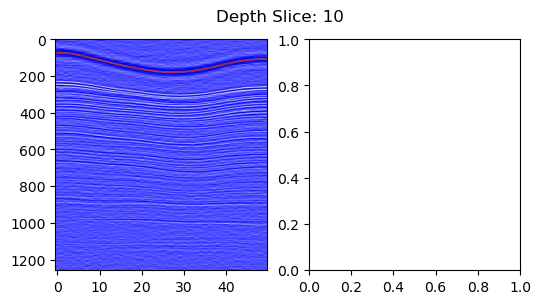

In [42]:
fig, axs = plt.subplots(1,2, figsize=(6,3))
depth = 10


fig.suptitle(f'Depth Slice: {depth}')
axs[0].imshow(seismic[depth,:,:].T, cmap=plt.cm.seismic, aspect='auto')
# axs[1].imshow(geology[depth,...], cmap=plt.cm.seismic)
plt.show()

TypeError: Shapes of x (50, 50) and z (50, 1259) do not match

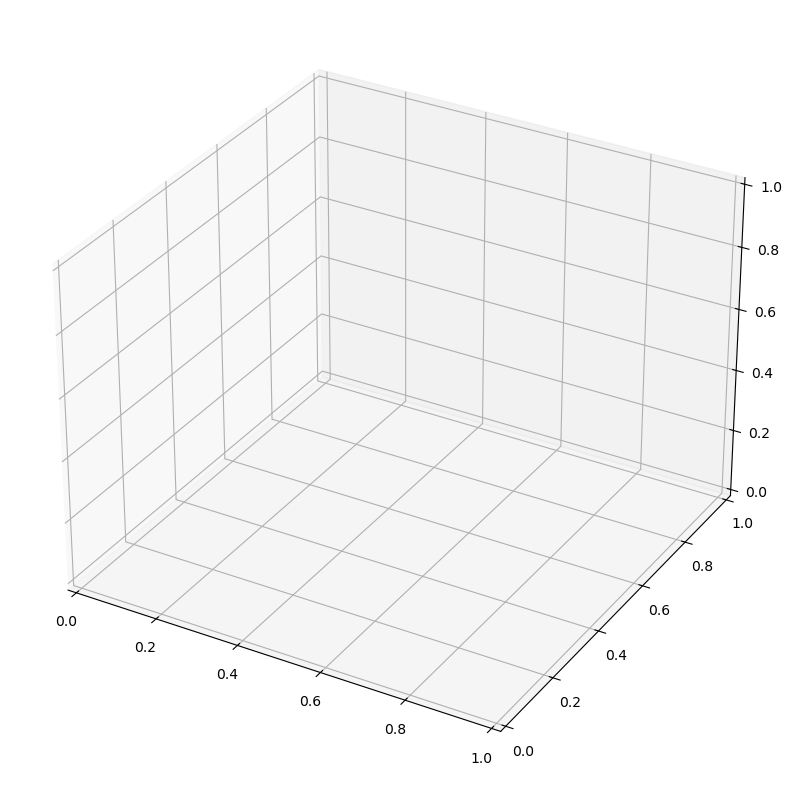

In [ ]:
import myavi